# Assessed Problems 8



***
## Q1) Integrating using SciPy [2 marks]

The intergral below cannot be calculate analytically so we must use numerical methods:

$$ I(x) = \int^x_0 \mathrm{e}^{-t^2} \mathrm{d}t $$

a) Plot a graph of the integrand from $t=[-5,5]$ with 11 steps and linearly interpolate to 101 steps. [1 mark]

b) Using `quad` function from `scipy.integrate`, plot $I(x)$ over the range $x=0$ to $5$. [1 mark]

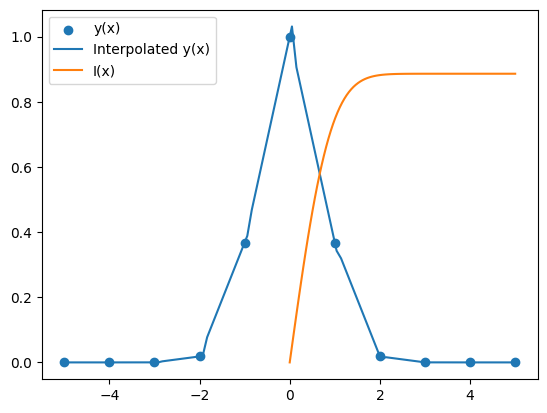

In [12]:
import numpy as np;
import matplotlib.pyplot as mpl;
from scipy.integrate import quad;

# The function f as shown above
def f(t):
    return np.exp(-1 * np.power(t, 2));

def I(x):
    return quad(f, 0, x)[0];

# Defining the points for part a
x = np.linspace(-5, 5, 11);
y = f(x);

# Defining the integral axis points
xIntegral = np.linspace(0, 5, 100);
yIntegral = [];
for xPoint in xIntegral:
    yIntegral.append(I(xPoint));

# Defining interpolation
def interpolate(xInputs, yInputs, stepCount):
    stepSize = (max(xInputs) - min(xInputs)) / stepCount;

    interpolatedX = [];
    interpolatedY = [];

    index = 0;

    for i in range(0, stepCount):
        x0 = xInputs[index];
        y0 = yInputs[index];
        x1 = xInputs[index + 1];
        y1 = yInputs[index + 1];

        x = min(xInputs) + i * stepSize;
        y = y0 + (x - x0) * ((y1 - y0) / (x1 - x0));

        interpolatedX.append(x);
        interpolatedY.append(y);

        # This checks if the new x is above the current upper bound point that is being interpolated from
        # It will update the bounds accordingly
        # A for loop was used in the instance that an incremental addition of stepSize goes over 2 whole indexes at once
        # This will never happen using linspace, but if the data was not equally spaced this is important
        for j in range(index, len(xInputs)):
            if (x < xInputs[j]):
                index = j - 1;
                break;

    return interpolatedX, interpolatedY;

xi, yi = interpolate(x, y, 101);

# Plotting the graph
mpl.scatter(x, y, label = "y(x)");
mpl.plot(xi, yi, label = "Interpolated y(x)");
mpl.plot(xIntegral, yIntegral, label = "I(x)");
mpl.legend();
mpl.show();

*** 

## Q2) Riemann Semi Circle [2 marks]

Consider the integral

$$ I = \int_{-1}^{1} \sqrt{1 - x^2} \,\mathrm{d} x$$


By considering the transformation $ y = \sqrt{1 - x^2}$, we see that the integral $I = \dfrac{\pi}{2}$.

a) Using Riemann integration (sum over **square** slices) with $N=100,000,000$ slices calculate a numerical approximation to $\hat{I}$. [1 mark]

b) Print the relative error between $I$ and $\hat{I}$ for different values of $N$ and determine the error relation. [1 mark]

Using N = 1000000, I(x) is approximately = 1.5707963251317274
The true value is = 1.5707963267948966, giving a delta of 1.663169157950506e-09


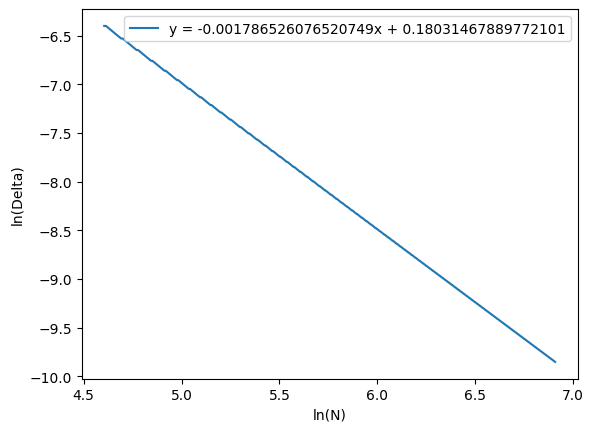

This line is in the form ln(y) = kx + ln(A)
The values for k and A can be found through identity with the equation on the graph
Hence the simplified equation for the delta is y = A*e^(kx)


In [1]:
import numpy as np;
import matplotlib.pyplot as mpl;
from scipy.integrate import quad;

def f(x):
    return np.sqrt(1 - np.power(x, 2));

def riemannIntegral(f, xLower, xUpper, N):
    dx = (xUpper - xLower)/N;
    currentSum = 0;

    for i in range (0, N):
        sliceArea = f(xLower + i * dx) * dx;
        currentSum += sliceArea;

    return currentSum;

# Only doing N = 1,000,000 to save on processing time
N = 1000000;
integral = riemannIntegral(f, -1, 1, N);
print("Using N = " + str(N) + ", I(x) is approximately = " + str(integral));
print("The true value is = " + str(np.pi / 2) + ", giving a delta of " + str(np.pi / 2 - integral))

x = np.linspace(100, 1000, 1000);
y = [];
for xPoint in x:
    y.append(np.pi / 2 - riemannIntegral(f, -1, 1, int(xPoint)));

label = "y = " + str((y[0] - y[-1]) / (x[0] - x[1])) + "x + " + str(y[0] - (y[0] - y[-1]) / (x[0] - x[1]) * x[0]); 

mpl.plot(np.log(x), np.log(y), label = label);
mpl.xlabel("ln(N)");
mpl.ylabel("ln(Delta)");
mpl.legend();
mpl.show();

print("This line is in the form ln(y) = kx + ln(A)")
print("The values for k and A can be found through identity with the equation on the graph")
print("Hence the simplified equation for the delta is y = A*e^(kx)");

# Q3) Blackbody radiation integration [2 marks]

A blackbody gives off radiation that has a power that is dependent on the temperature and was derived by Planck to be:

$$ B(\nu,T) = \frac{2h \nu^3}{c^2} \frac{1}{e^{\frac{h \nu}{kT}}-1}, $$

where $\nu$ is the frequency of light, $T$ is the temperature, $k$ is the Boltzmann constant and $c$ is the speed of the light.

* a) Integrate $B$ over all frequencies to work out the total power across the entire spectrum for T=300 K [1 mark]

* b) Plot the integral of $B$ to the power of (1/4) as a function of temperature, $T$. What is the relation therefore between the temperature of a black body and the power it radiates? [1 mark]

The integral of B(v, 300) across v = 0 to infinity = 146.2482689872973


C:\Users\samue\AppData\Local\Temp\ipykernel_33640\3209082566.py:13: RuntimeWarning: overflow encountered in exp
  return ((2 * h * np.power(v, 3)) / (np.power(c, 2) * (np.exp((h * v) / (k * T)) - 1)));
C:\Users\samue\AppData\Local\Temp\ipykernel_33640\3209082566.py:13: RuntimeWarning: overflow encountered in scalar multiply
  return ((2 * h * np.power(v, 3)) / (np.power(c, 2) * (np.exp((h * v) / (k * T)) - 1)));


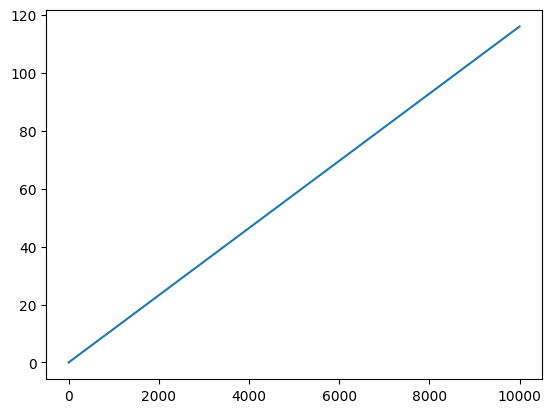

The relationship shown is that the power output is directly proportional to Temperature to the power of 4


In [2]:
import numpy as np;
import matplotlib.pyplot as mpl;
from scipy.integrate import quad;
from functools import partial;

# Defining the constants used in B
h = 6.626 * 10**-34;
c = 2.999 * np.power(10, 8);
k = 1.381 * 10**-23;

# Defining the function B
def B(v, T):
    return ((2 * h * np.power(v, 3)) / (np.power(c, 2) * (np.exp((h * v) / (k * T)) - 1)));

# Using infinity doesn't work, so a large value as the upper bound has been chosen instead
print("The integral of B(v, 300) across v = 0 to infinity = " + str(quad(partial(B, T = 300), 0, 1e16)[0]));

# Creating the axis
x = np.linspace(1, 10000, 1000);
y = [];
for xPoint in x:
    F = partial(B, T = xPoint);
    y.append(np.power(quad(F, 0, 1e16)[0], 1/4));

mpl.plot(x, y);
mpl.show();

print("The relationship shown is that the power output is directly proportional to Temperature to the power of 4")